### Question 1: How are the type of real estate distributed by district in Ho Chi Minh city? 

For this question, we are investigating the real estate product type (ex. `Căn hộ chung cư`, `Văn phòng`...) and how they are related to districts in Ho Chi Minh city and vice versa. Although at first the question seems quite simple, it becomes quite complex as we dig deeper into the data.

In [278]:
# import necessary library
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

import plotly.express as px


In [3]:
# Define the display of long decimal values
def thousands_formatter(x):
    if isinstance(x, str):
        return x
    return "{:,}".format(int(x))
pd.set_option('display.float_format', thousands_formatter)

Let's see what we have in our data.

In [4]:
data = pd.read_csv('processed_rent_data.csv', index_col=0)
data = data[data['Rent type'] != 'Bất động sản khác']
data

,Rent type,Post date,Area,Price,Bedrooms,Toilets,Furniture,Floors,District
0,Căn hộ chung cư,2023-12-07,50,"17,000,000",1,1,không,NaN,2
1,Căn hộ chung cư,2023-12-05,50,"17,000,000",1,1,không,NaN,2
2,Căn hộ chung cư,2023-12-02,77,"23,000,000",2,2,không,NaN,2
3,Căn hộ chung cư,2023-12-02,50,"17,000,000",1,1,không,NaN,2
4,Căn hộ chung cư,2023-12-05,52,"16,900,000",1,1,cơ bản,NaN,2
...,...,...,...,...,...,...,...,...,...
40594,"Kho, nhà xưởng, đất",2023-11-08,"8,000","100,000,000",NaN,NaN,không,NaN,bình tân
40595,"Cửa hàng, ki ốt",2023-11-08,160,"130,000,000",NaN,NaN,không,NaN,5
40596,"Kho, nhà xưởng, đất",2023-11-08,"1,350","22,000,000",NaN,NaN,không,NaN,hóc môn
40597,"Kho, nhà xưởng, đất",2023-11-08,"17,000","20,000,000",NaN,NaN,không,NaN,bình tân


#### 1.1 How are the number of real estate for rent distributed across districts in Ho Chi Minh city?

In other word, we are asking:
- Which districts has the most real estate property for rent? 
- Which districts has the least real estate property for rent? 

=> **How big** is **the renting market** in **each districts** and how are they compared to each other.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


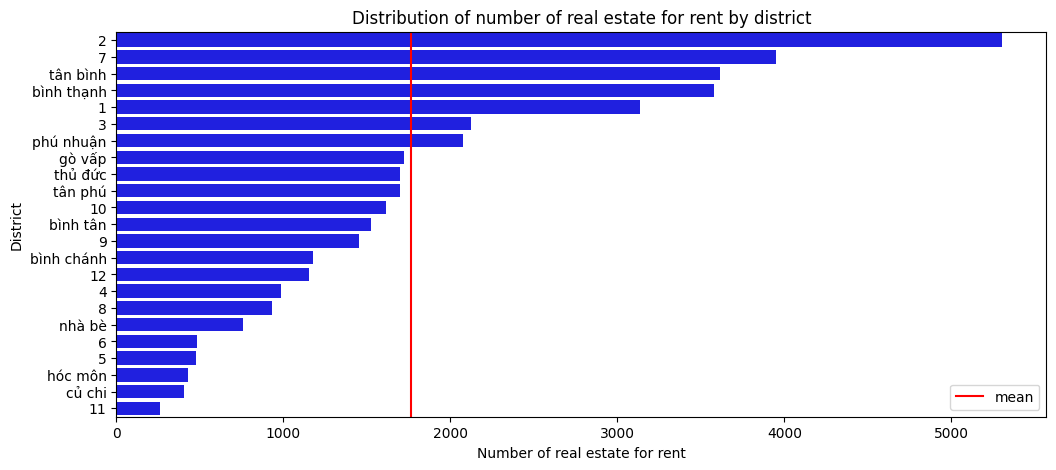

In [5]:
rent_district_count = data.groupby('District')['Rent type'].agg(count='count').reset_index()

plt.pyplot.figure(figsize=(12, 5))
ax = sns.barplot(x='count', y='District', data=rent_district_count.sort_values(by='count', ascending=False), color='blue')
# ax.set_xscale("log")
ax.set(title='Distribution of number of real estate for rent by district', xlabel='Number of real estate for rent')
ax.axvline(x = np.mean(rent_district_count['count']), color='red', label='mean')
ax.legend()

Looking at the graph, we can divide the districts into 2 groups: those with number of property for rent over average, and those under average. There are 6 over average districts: `District 2`, `District 7`, `Tân Bình District`, `Bình Thạnh District`, `1st District`, `District 3` and `Phú Nhuận District`. With in the over average district, `District 2` is at the top with more than 5000 rental property on sale, `District 7` at second place with around 4000 and `Tân Bình District` at 3rd place at around 3900.

The gap between the number of rental property, and subsequenly the scale of the real estate rental property market in each districts differ drastically. Even in the over average group there is a big gap - `District 2` doubles `Phú Nhuận District`.  

#### 1.2 How are the number of real estate for rent distributed across rent type in Ho Chi Minh city?

In other word, we are asking:
- Which property for rent has the most real estate product for sale? 
- Which property for rent has the least real estate product for sale? 

=> **How big** is **the renting market** in **each property type** and how are they compared to each other.

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


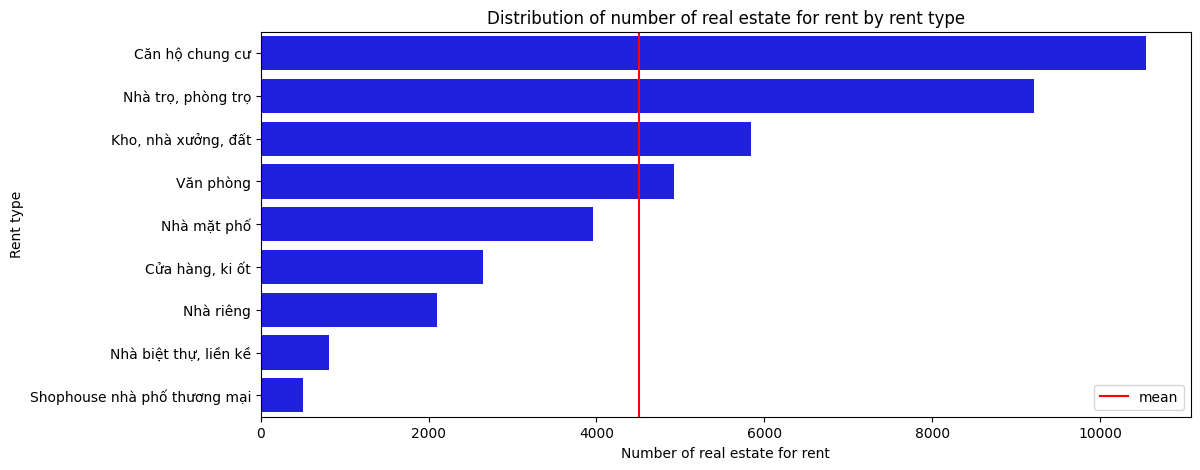

In [6]:
rent_type_count = data.groupby('Rent type')['District'].agg(count='count').reset_index()

plt.pyplot.figure(figsize=(12, 5))
ax = sns.barplot(x='count', y='Rent type', data=rent_type_count.sort_values(by='count', ascending=False), color='blue')
# ax.set_xscale("log")
ax.set(title='Distribution of number of real estate for rent by rent type', xlabel='Number of real estate for rent')
ax.axvline(x = np.mean(rent_type_count['count']), color='red', label='mean')
ax.legend()

Again, we can divide the property type into 2 groups: those with number of property for rent over average, and those under average. The top 3 most popular property type are: `Căn hộ chung cư`, `Nhà trọ, phòng trọ` and `Kho, nhà xưởng, đât`. The gaps between the number of property are also very large, with `Căn hộ chung cư` is more than 5 times `Nhà riêng`'s property for rent.

### 1.3 What is the distribution of number of property for rent by district and property type?

In other word, we are asking: 
- What is the most popular rental property type in Ho Chi Minh city? 
- Where are the most popular rental property type distributed in Ho Chi Minh city?

=> What is the popularity of each rental property type in Ho Chi Minh city and where are they?

[Text(0.5, 1.0, 'Distribution of number of real estate for rent by district and rent type')]

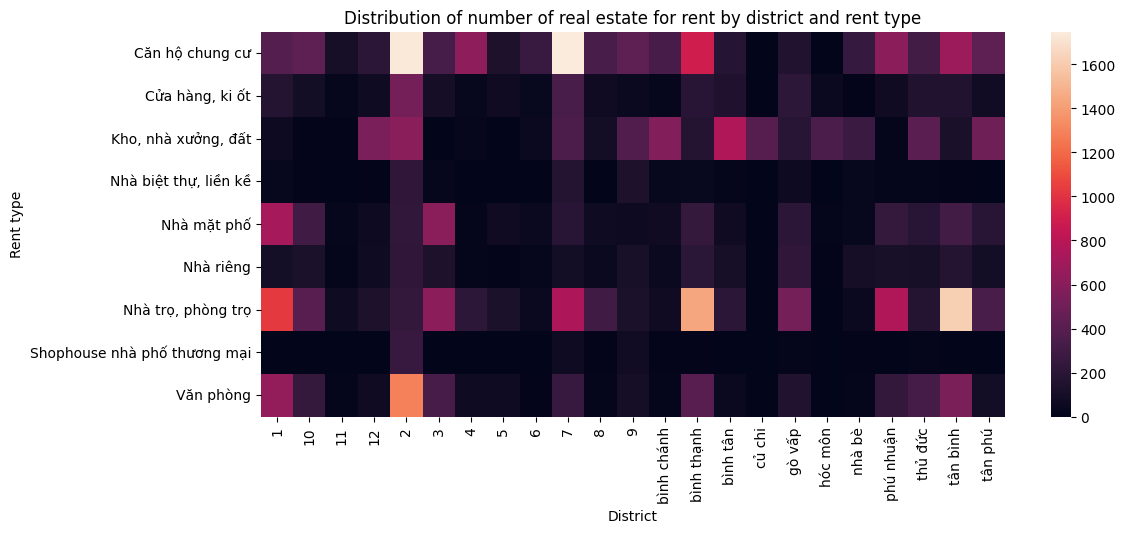

In [7]:
rent_district_count_by_type = data.groupby(['District', 'Rent type'])['Rent type'].agg(count='count').reset_index().pivot(index='District', columns='Rent type', values='count').fillna(0)

plt.pyplot.figure(figsize=(12, 5))
sns.heatmap(rent_district_count_by_type.T).set(title='Distribution of number of real estate for rent by district and rent type')

Looking at the graph makes the popularity of some property type much clearer. Most of the property types are sparse and few, with make up the solid color pallete that populate most of the graph. Among that, we can see that some property type are quite popular, and with some especially popular in specific districts, and other are distributed more evenly across the board.

Take the 4 most popular property type. 
- `Căn hộ chung cư`: Mostly concentrated in `District 2` and `District 7`. Other than that, it's also quite popular in `Bình Thạnh District`, `District 4`, `Phú Nhuận District` and `Tân Bình District`.
- `Nhà trọ, phòng trọ`: Mostly concentrated in `Tân Bình District` and `Bình Thạnh District`. Pther than that, it's also quite popular in `1st District`, `District 3`, `District 7`, `Gò Vấp District` and `Phú Nhuận District`.
- `Kho, nhà xưởng, đất`: Not concentrated in any district in particular but we can see that it's very unpopular in central districts like `1st District` and `District 5`. It's quite popular in `District 1`, `District 12`, `Bình Chánh District` and `Bình Tân District`.
- `Văn phòng`: Mostly concentrated in `District 2`, though it's also quite popular in `1st District` and `Tân Bình District`.


### 1.4 What is the distribution of property type by district ratio?

In other word, we're asking:
- In percentage, for each property type, where are they concentrated the most?
- In percentage, for each property type, where are they concentrated the least?

=> How popular is each property type for rent is in every district?

[Text(0.5, 1.0, 'Distribution of real estate in districts by type by percentage')]

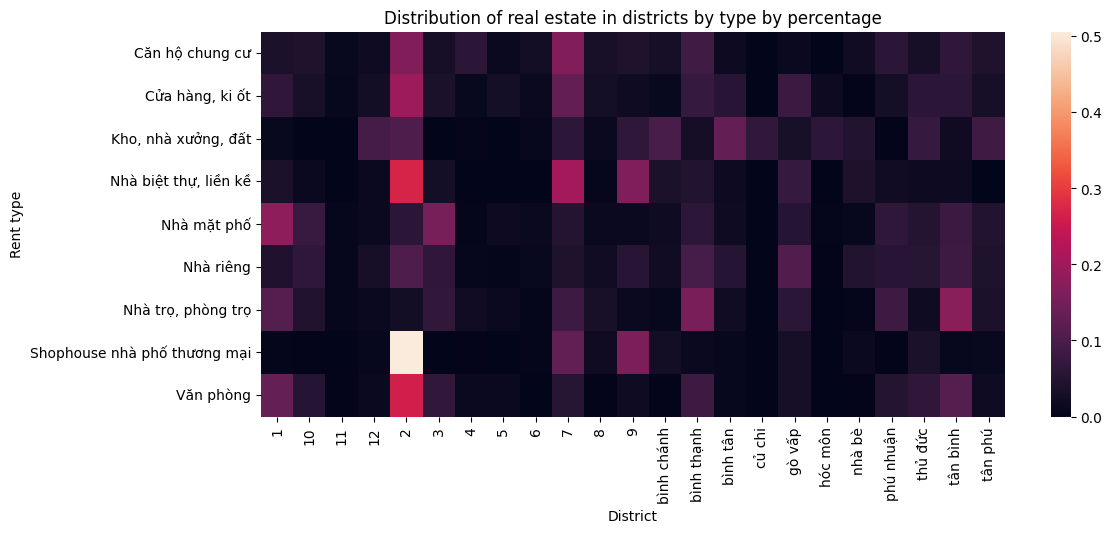

In [8]:
# rent_district_count.set_index('District', inplace=True)
rent_type_district_count = data.groupby('Rent type')['District'].agg(count='count').reset_index().set_index('Rent type')

def get_ratio(x):
    return x/rent_type_district_count.loc[x.name].values
rent_district_count_by_type_percentage = rent_district_count_by_type.T.apply(get_ratio, axis=1)

plt.pyplot.figure(figsize=(12,5))
sns.heatmap(rent_district_count_by_type_percentage).set(title='Distribution of real estate in districts by type by percentage')

Looking at the graph, we can see that some districts are very popular, while others are not so much. Some popular districts are `District 2`, `District 7`, `1st District` and `District 9`. 

Let's go through the property type one by one for better view of the situation in each:
- `Căn hộ chung cư`: Popular in `District 2`, `Distric 7`, `Bình Thạnh District`.
- `Cửa hàng, ki ốt`: Popular in `District 2`, `Distric 7`.
- `Kho, nhà xưởng, đất`: Popular in `Bình Tân District`, `Bình Chánh District`.
- `Nhà biệt thự, liền kề`: Popular in `District 2`, `District 7`, `District 9`.
- `Nhà mặt phố`: Popular in `1st Dítrict`, `District 3`.
- `Nhà riêng`: Mostly spread out but quite popular in `Bình Thạnh District`, `Gò Vấp District` and `District 2`.
- `Nhà trọ, phòng trọ`: Popular in `Bình Thạnh District`, `Tân Bình District` and `1st District`.
- `Shophouse, nhà phố thương mại`: Very popular in `District 2`. Quite popular in `District 7` and `District 9`.
- `Văn phòng`: Very popluar in `District 2`. Quite popular in `1st District` and `Tân Bình District`.
- `Bất động sản khảc`: Very popular in `District 2`.

### 1.5 What is the distribution of district by property type ratio?

In other word, we are asking:
- In percentage, what is the distribution of property type in each district?

=> How popular is each district by property type?

[Text(0.5, 1.0, 'Distribution of real state type in district by percentage')]

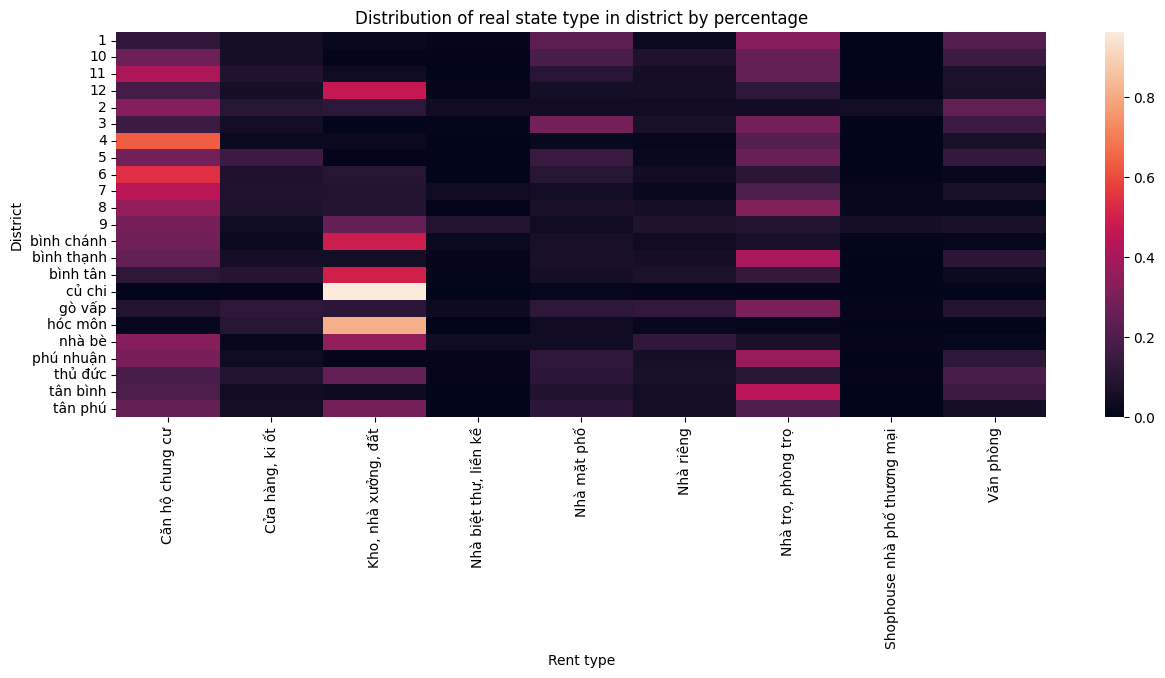

In [9]:
rent_district_count.set_index('District', inplace=True)
def get_ratio(x):
    return x/rent_district_count.loc[x.name].values
rent_district_count_by_type_percentage = rent_district_count_by_type.apply(get_ratio, axis=1)

plt.pyplot.figure(figsize=(15,5))
sns.heatmap(rent_district_count_by_type_percentage).set(title='Distribution of real state type in district by percentage')

Let's go through the District one by one for better view of the situation in each:
- `1st District`: Popular with `Nhà mặt phố`, `Nhà trọ, phòng trọ`, `Văn phòng`.
- `District 2`: Popular with `Căn hộ chung cư`, `Văn phòng`.
- `District 3`: Popular with `Nhà mặt phố`, `Nhà trọ, phòng trọ`.
- `District 4`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`.
- `District 5`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`, `Cửa hàng, ki ốt`.
- `District 6`: Popular with `Căn hộ chung cư`.
- `District 7`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`.
- `District 8`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`.
- `District 9`: Popular with `Căn hộ chung cư`, `Kho, nhà xưởng, đất`.
- `District 10`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`, `Nhà mặt phố`.
- `District 11`:Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`, `Nhà mặt phố`.
- `District 12`: Popular with `Kho, nhà xưởng, đất`, `Căn hộ chung cư`.
- `Bình Chánh District`: Popular with `Kho, nhà xưởng, đất`, `Căn hộ chung cư`.
- `Bình Thạnh District`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`.
- `Củ Chi District`: Popular with `Kho, nhà xưởng, đất`, `Phòng trọ, nhà trọ`.
- `Gò Vấp District`: Popular with `Phòng trọ, nhà trọ`.
- `Bình Tân District`: Popular with `Kho, nhà xưởng, đất`.
- `Nhà Bè District`: Popular with `Căn hộ chung cư`, `Kho, nhà xưởng, đất`.
- `Hóc Môn District`: Popular with `Kho, nhà xưởng, đất`.
- `Nhà Bè District`: Popular with `Căn hộ chung cư`, `Kho, nhà xưởng, đất`.
- `Phú Nhuận District`: Popular with `Căn hộ chung cư`, `Phòng trọ, nhà trọ`.
- `Thủ Đức District`: Popular with `Căn hộ chung cư`, `Kho, nhà xưởng, đất`.
- `Tân Bình District`: Popular with `Nhà trọ, phòng trọ`.
- `Tân Phú District`: Popular with `Căn hộ chung cư`, `Kho, nhà xưởng, đất`, `Nhà trọ, phòng trọ`.

## Question 2: How are the cost of real estate distributed by district in Ho Chi Minh city?

For this question, we are investigating the real estate product type (ex. `Căn hộ chung cư`, `Văn phòng`...) and how their cost are related to districts in Ho Chi Minh city and vice versa.

### 2.1 How are the cost of real estate type for rent distributed?

In other word, we are asking:
- Which property type is the most expensive? 
- Which property type is the least expensive? 

=> **How** does **property type** influences **cost**?

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


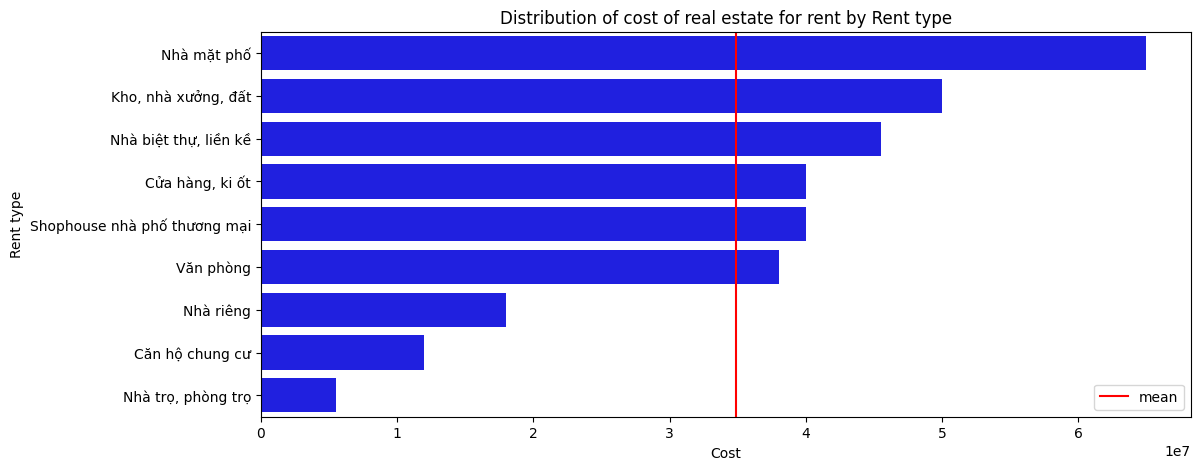

In [10]:
rent_type_cost = data.groupby(['Rent type'])['Price'].agg(mean='median').reset_index()

plt.pyplot.figure(figsize=(12, 5))
ax = sns.barplot(x='mean', y='Rent type', data=rent_type_cost.sort_values(by='mean', ascending=False), color='blue')
# ax.set_xscale("log")
ax.set(title='Distribution of cost of real estate for rent by Rent type', xlabel='Cost')
ax.axvline(x = np.mean(rent_type_cost['mean']), color='red', label='mean')
ax.legend()

As we can see, the cost structure of different property type differ greatly depends of the type of property it is. Less populer property types are more expensive while more popular property types are less expensive. 

Among the 2 group of property type with cost greater than mean and lower, we can see a clear theme is that the property that is more expensive are products aiming at businesses, while the cheaper products are for living (basic needs).

### 2.2 How are the cost of real estate for rent distributed across the districts in Ho Chi Minh city?

For this question, we are asking how the value of 1 type of real estate differ accross districts in Ho Chi Minh city.

Let's look at the cost of all property type by all districts in Ho Chi Minh city. 

Because of the complicated data we're handling and the number of dimension I'm turning to a new map type called a treemap. It's often use to illustrate highly dense dataset. I'm using the plotly library that comes with an interactive map environment.

In [292]:
tree_map_test_data = data.groupby(['District', 'Rent type'])['Area'].agg(mean_cost_per_m2='mean').reset_index()
tree_map_test_data

,District,Rent type,mean_cost_per_m2
0,1,Căn hộ chung cư,70
1,1,"Cửa hàng, ki ốt",179
2,1,"Kho, nhà xưởng, đất",665
3,1,"Nhà biệt thự, liền kề",307
4,1,Nhà mặt phố,324
...,...,...,...
191,tân phú,Nhà mặt phố,211
192,tân phú,Nhà riêng,84
193,tân phú,"Nhà trọ, phòng trọ",28
194,tân phú,Shophouse nhà phố thương mại,108


In [296]:
tree_map_test_data = data.groupby(['District', 'Rent type'])['Price'].agg(mean='mean').reset_index()

fig = px.treemap(
    data_frame= tree_map_test_data,
    path=['Rent type', 'District'], values='mean', branchvalues='total',
    hover_data=None,
    hover_name=None,
    title="Distribution of mean cost of property type by district")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

The graph is divided by districts, and the size of `each districts` is determined by the sum of the `average cost` of `all property type for rent` in each districts. 

The data is nicely illustrated though I have to admit it's very packed. From the look of things, it's seems that the `Kho, nhà xưởng, đất` is one with the biggest monitary investment, follow by `Nhà mặt phố`, `Văn phòng`, `Cửa hàng, ki ốt` and `Shouphouse nhà phố thương mại`. All of which are real estate product usually purchase/rent by business. The remaining for type of real estate product only take about 1/5 the space of the graph and all for living purposes.

Let's go further into each graph to explore the cost and its relation with geographic location (district) of each real estate property:
- `Kho, nhà xưởng, đất`: Being popular in `Bình Tân District`, `Bình Chánh District`, it's most expensive in `Tân Phú District` (more than 1 billion vnd). If we ignore that statistic (as it is too big it mights be an outliner), we can see that `Gò Vấp District` and `District 3` are the following most expensive place for this service (about 250 millions vnd). The cheapest districts to rent this property is `Disstrict 8` and `Bình Thạnh District`.
- `Nhà mặt phố`: Being popular in `1st Dítrict`, `District 3`, the cost in these 2 districts are also the most expensive (about 180 millions vnd). The cheapest place to rent this property is in `Hóc Môn District` and `Củ Chi District` with the average cost about 18 to 10 millions respectively.
- `Văn phòng`: Being popluar in `District 2`, it's most expensive in `District 11` (almost 300 millions vnd). The cheapest place to rent this property is in `Củ Chi District` and `Hóc Môn District` at around 3 million vnd, but consider the total distribution of other district on should expect the rent to be more than 30 millions vnd.
- `Cửa hàng, ki ốt`: Being popular in `District 2`, `Distric 7`, it's most expensive in `District 6` and `Bình Thạnh District` (around 130 million vnd). The cheapest place to rent thís property is in `District 4` and `Tân Phú District`.
- `Shophouse, nhà phố thương mại`: Being popular in `District 2` it's also quite expensive to rent with `District 2` being the 3rd most expensive place to rent this type of property in HCM city (~94 millions vnd). The most expensive place to rent is `District 10` with about 300 millions vnd and the cheapest are from `Phú Nhuận District` at 13, 5 million vnd.
- `Nhà biệt thự, liền kề`: Being popular in `District 2` but also quite expensive with `District 2` score 3rd place in the most expensive place for rental at 85 millions vnd. The most expensive place to rent is `District 3` at 130 millions vnd and the cheapest place to rent is `District 12` at 18 millions vnd.
- `Nhà riêng`: The popularity for this property is quite spread out, but there are quite a continuous price range to choose from with this type. The most expensive place is `District 2` (50 millions vnd) and the cheapest is `Củ Chi District` (5 millions vnd). The rest of the district spread between the 2 quite evenly.
- `Căn hộ chung cư`: Being popular in `District 2`, `Distric 7`, `Bình Thạnh District`, these are also the places that this property is expensive to rent. The most expensive place is `District 2` (26 milliions vnd), `1st District` (20 million vnd) and `District 4` (17 millions vnd). The cheapest place to rent is `District 9` (7 million vnd) and `Hóc Môn District` (5 millions vnd).
- `Nhà trọ, phòng trọ`: As it's most popular in `1st District` it's also the most expensive here with monthly rent amount to 6 millions vnd on average. The range of cost for this rental property isn't high, and the 3 most expensive place to rent are all about 6 millions vnd. The cheapest place to rent are `Củ Chi Distrit` and `Hóc Môn District` with the cost about 2.4 millions to 1.9 millions respectively.

But after such extensive statistics, I realize there must be more than look the eye if we only look at the mean of the price tag for each district. Particularly, I start to questions the relationship between the average area for rent for each property type and how it correlated to the cost in each districts. 

So let's dig deeper into the data.

### 2.3 Are the cost of each property type in each districts derminined by the location of that property or because of the available area of the property?

Note: 
- The question might be confusing. For real estate it's somewhat obvious that the location of the property also dictates the available space for that property. For example, it's very unlikely that there will be an extensive 1000 m2 warehouse in the middle of the 1st District - very unreasonable as it goes against the economic structure of 1st District and for that reason it's existance would not be very firm (The owner will most likely have to close down the warehouse becuase unable to out profit the costs), but it's is very much more reasonable to have many property like that in a more industrial district. 
- The core of the questions is just me asking whether the property in each districts is expensive all because it is in that districts, or does the available area have more affects on cost?

aka. 
- Is the cost for `Kho, nhà xưởng, đất` so expensive in `Tân Phú District` (or `Văn phòng` in `District 11`, `Shophouse` in `District 10`...)becuase it's expensive to build and maintain that type of property there, or just because there are more land to build `Kho, nhà xưởng, đất` and more land ~ more cost?
- Does the ${cost \over area}$ ratio vary greatly in each districts? If they are the same can we conclude that the magnitute of area in each districts plays an important role in costs?

To answer this questions, we will use the same plot to illustrate the distribution of average area for each property type in each districts  and ${cost \over area}$ ratio or each property type in each district.

In [302]:
tree_map_test_data_area = data.groupby(['District', 'Rent type'])['Area'].agg(mean='mean').reset_index()

fig = px.treemap(
    data_frame= tree_map_test_data_area,
    path=['Rent type', 'District'], values='mean', branchvalues='total',
    hover_data=None,
    hover_name=None,
    title="Distribution of mean area of property type by district")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Let's compare the district of the biggest average area to the most expensive district for each property type to see if our theory was correct. I will only be comparing the price and area for the property types that has unresonable average cost for top districts (property type with outliner).

- `Kho, nhà xưởng, đất`:   
        Most expensive: `Tân Phú District` - ranked 15th in area.   
        Largest in area: `Củ Chi District` - ranked 6th most expensive.   
        -> There are **no correlation** between price and area for this property type.   

- `Văn phòng:`:  
        Most expensive: `District 11` - ranked 1st in area.   
        => There are **strong correlation** between price and area for this property type.

- `Shophouse`:  
        Most expensive: `District 10` - ranked 2nd in area.   
        Largest in area: `District 8` - ranked 4th most expensive.   
        => There are **some correlation** between price and area for this property type.   

From this analysis, we can see that although there are some correlation between cost and area of property, it's quite vary between property types - meaning there must be other factors to influence the cost of a property.

Now, let's take the final view in cost distribution with our ${cost \over area}$ analysis. Are the ratio distributed equally accross the grids?


In [301]:
tree_map_test_data_ratio = tree_map_test_data_area
tree_map_test_data_ratio['ratio'] = tree_map_test_data['mean'] / tree_map_test_data_area['mean']


fig = px.treemap(
    data_frame= tree_map_test_data_ratio,
    path=['Rent type', 'District'], values='ratio', branchvalues='total',
    hover_data=None,
    hover_name=None,
    title="Distribution of mean cost/area ratio of property type by district")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Looking at the graph, there are some new trends emerging. Some establish trends that we have encover persis, like with `Tân Phú District` in `Kho, nhà xưởng, đất`. There seems to be some property with this type of trend (expensive ${cost \over area}$ ratio ouliner district), like `Nhà riêng` and `Shophouse nhà phố thương mại` property as well. 

But some other property's cost are distributed quite uniformly between district and the gaps in ${cost \over area}$ ratio aren't very big. Noticably, the `Nhà trọ, phòng trọ` property fit this discription very well, and `Căn hộ chung cư` property type to a lesser extends.

Overall, we see that there are many facets and relationships between dimensions of data, and looking at that relationships helps encover new trends and new questions as well. 

### Question 3: Which factors will affect the price of each property type? 

In other word: What is the relationship between the price and other factor?

In [25]:
real_estate_price = data.copy()


In [26]:
real_estate_type = real_estate_price['Rent type'].value_counts()

In [28]:
district_dummy = pd.get_dummies(real_estate_price['District'])

In [120]:
test = pd.concat([real_estate_price, district_dummy], axis=1)
test['Furniture'] = test['Furniture'].str.replace('không', '0').str.replace('có', '1').str.replace('cơ bản', '2').str.replace('đầy đủ', '3').astype(np.float64)
test.drop(['Post date', 'District'], axis=1, inplace=True)

In [102]:
test.fillna(-1, inplace=True)

In [124]:
real_estate_type = test['Rent type'].unique()

9

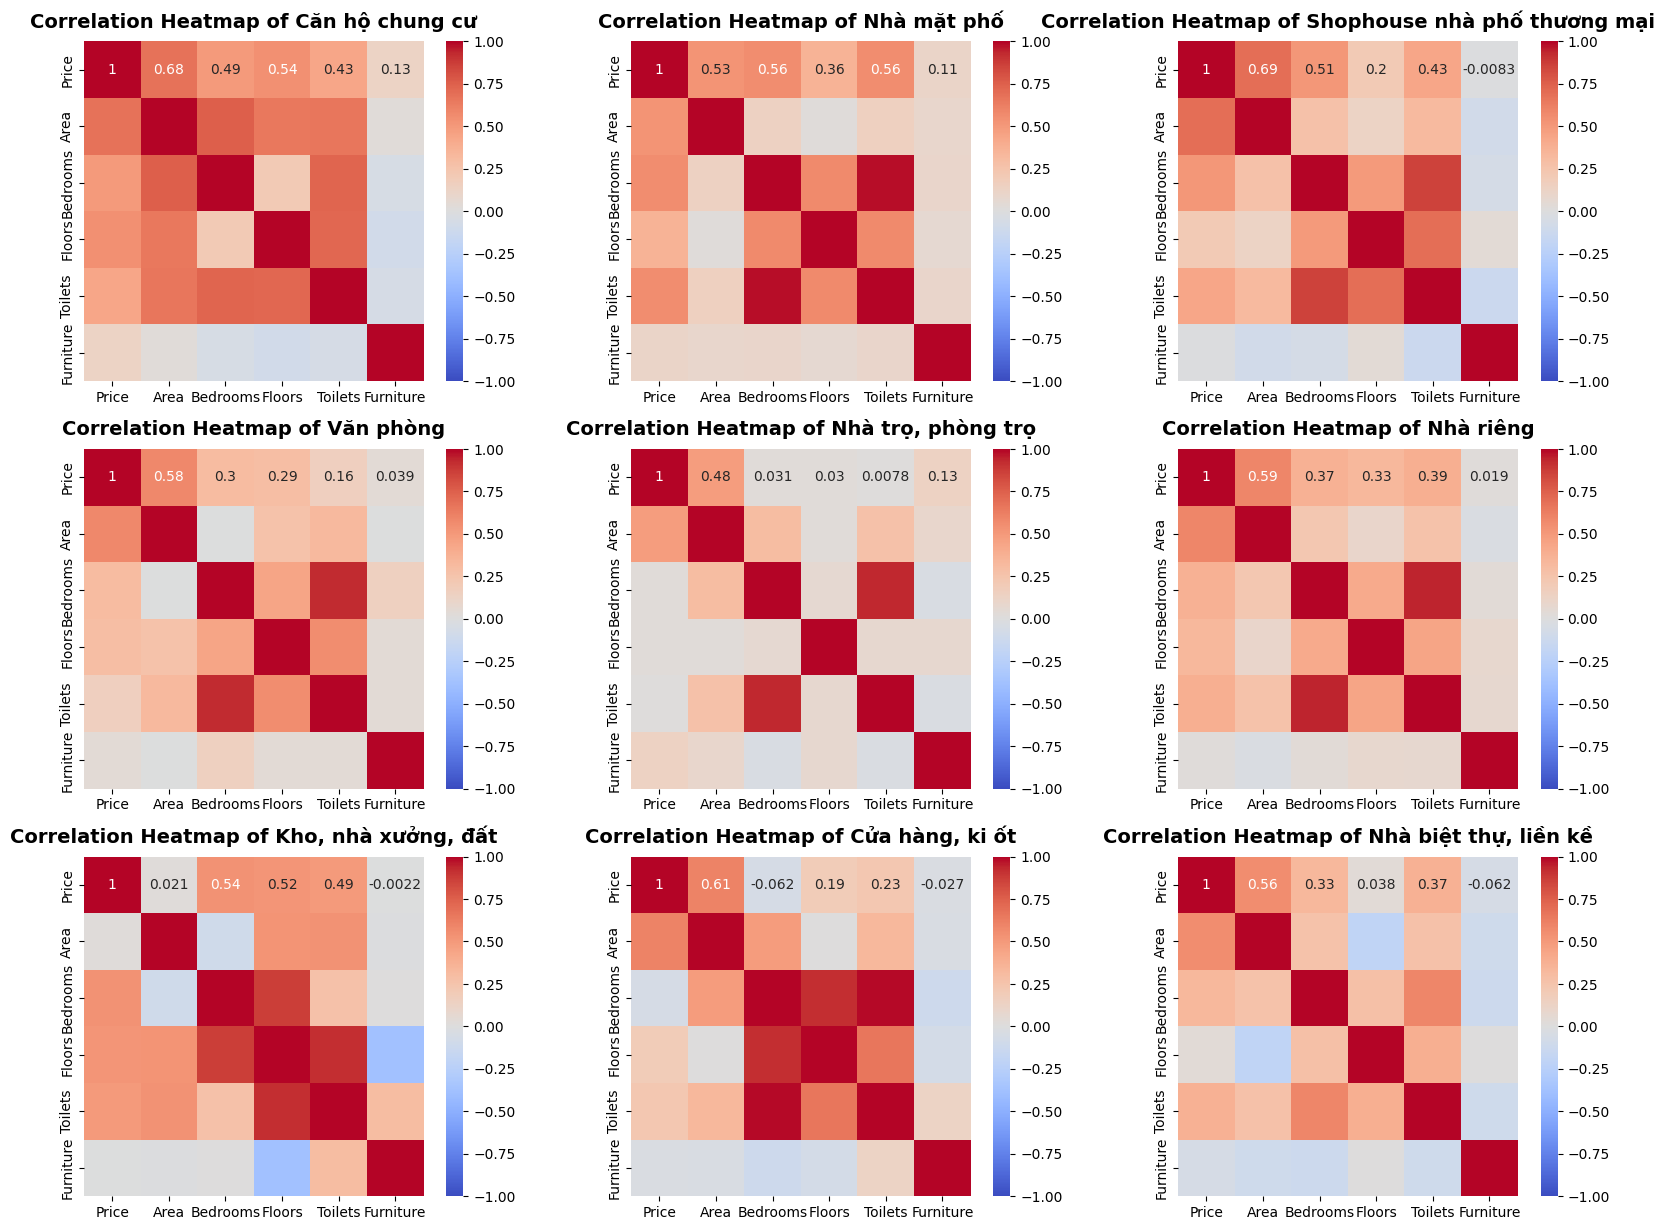

In [127]:
target = ['Price', 'Area', 'Bedrooms', 'Floors', 'Toilets', 'Furniture']

fig, axes = plt.pyplot.subplots(3,3, figsize=(20, 15))
# plt.pyplot.subplots_adjust(wspace=1)  # Adjust the horizontal space between subplots
i = 0
for index in range(len(real_estate_type)):
    ax = axes[i//3, i%3]
    sns.heatmap(test[test['Rent type'] == real_estate_type[index]][target].corr(), annot=True, cmap='coolwarm',square=True, vmin=-1, vmax=1, ax= ax)
    ax.set_title(f'Correlation Heatmap of {real_estate_type[index]}', fontsize = '14', fontweight = 'bold', pad = 10)
    i += 1

In [190]:
target = pd.Series(index = ['Price','2', '1', 'bình thạnh', '7', 'gò vấp', 'tân bình', '9',
       'bình chánh', 'tân phú', 'phú nhuận', '4', 'bình tân', 'thủ đức',
       '10', '6', '3', '5', '8', '12', 'nhà bè', 'củ chi', '11',
       'hóc môn'])
       
target.drop('1').index.to_numpy()

array(['Price', '2', 'bình thạnh', '7', 'gò vấp', 'tân bình', '9',
       'bình chánh', 'tân phú', 'phú nhuận', '4', 'bình tân', 'thủ đức',
       '10', '6', '3', '5', '8', '12', 'nhà bè', 'củ chi', '11',
       'hóc môn'], dtype=object)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



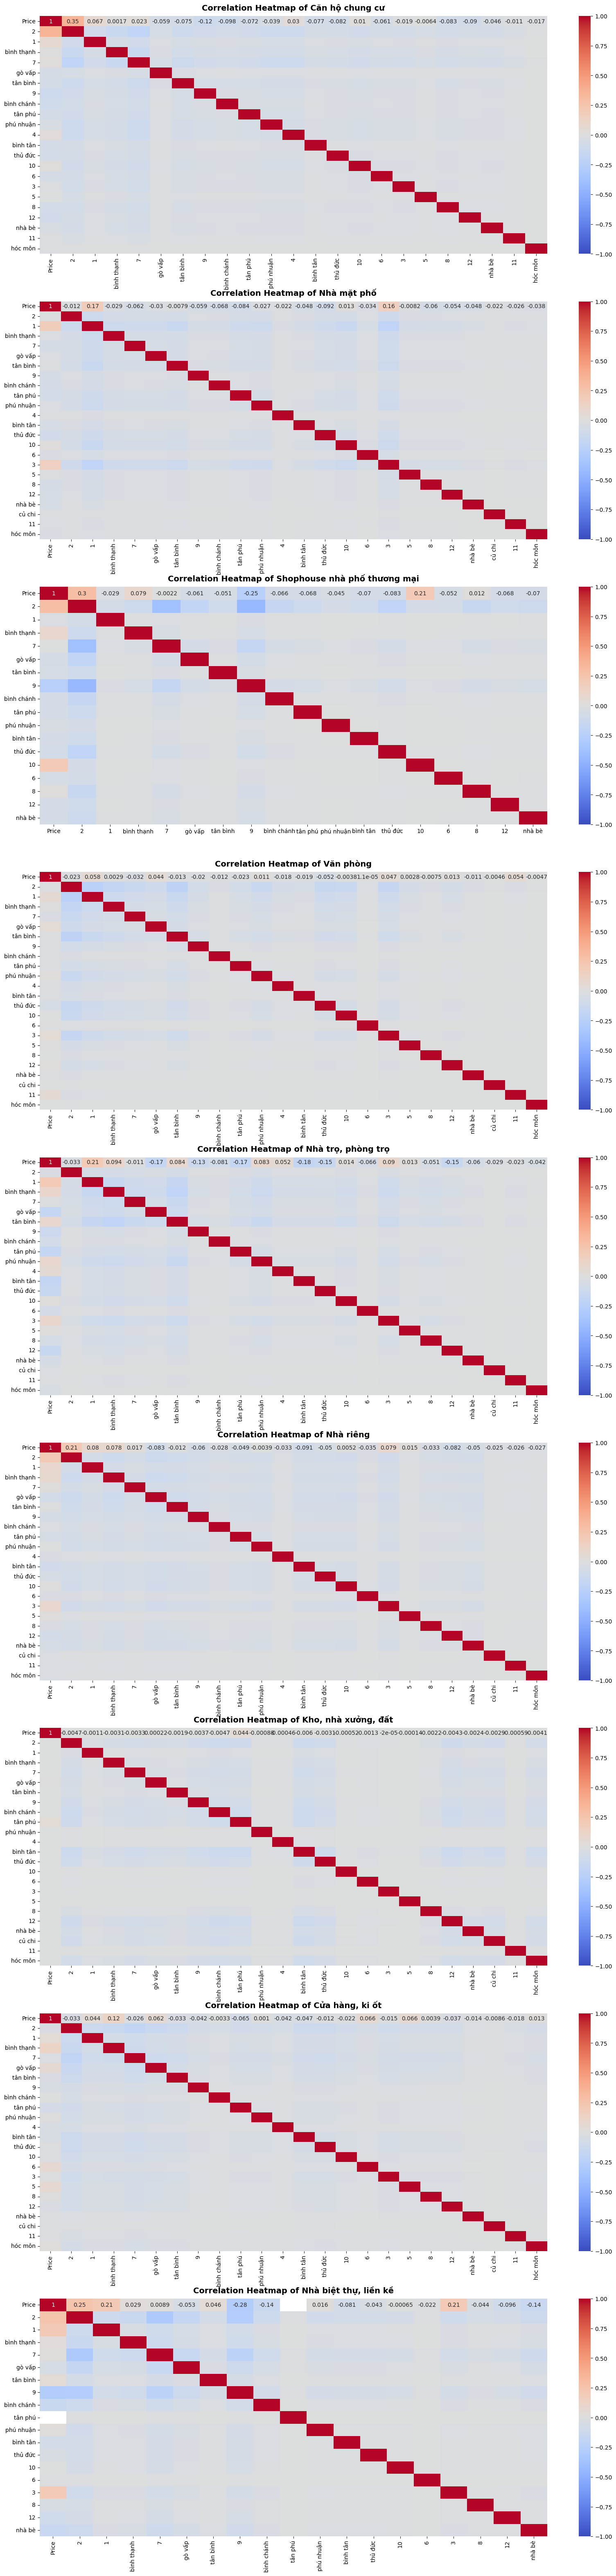

In [197]:
target = pd.Series(index = ['Price','2', '1', 'bình thạnh', '7', 'gò vấp', 'tân bình', '9',
       'bình chánh', 'tân phú', 'phú nhuận', '4', 'bình tân', 'thủ đức',
       '10', '6', '3', '5', '8', '12', 'nhà bè', 'củ chi', '11',
       'hóc môn'])
fig, axes = plt.pyplot.subplots(9, figsize=(20, 80))
# plt.pyplot.subplots_adjust(wspace=1)  # Adjust the horizontal space between subplots
i=0
for index in range(len(real_estate_type)):
    ax = axes[i]

    if(real_estate_type[index] == 'Căn hộ chung cư'):
        sns.heatmap(test[test['Rent type'] == real_estate_type[index]][target.drop(['củ chi']).index.to_numpy()].corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, ax= ax)
    elif(real_estate_type[index] == 'Shophouse nhà phố thương mại'):
        sns.heatmap(test[test['Rent type'] == real_estate_type[index]][target.drop(['3', '5', '11', 'củ chi', 'hóc môn', '4']).index.to_numpy()].corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, ax= ax)
    elif(real_estate_type[index] == 'Nhà biệt thự, liền kề'):
        sns.heatmap(test[test['Rent type'] == real_estate_type[index]][target.drop(['4', '5', '11', 'củ chi', 'hóc môn']).index.to_numpy()].corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, ax= ax)
    else:
        sns.heatmap(test[test['Rent type'] == real_estate_type[index]][target.index.to_numpy()].corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, ax= ax)

    ax.set_title(f'Correlation Heatmap of {real_estate_type[index]}', fontsize = '14', fontweight = 'bold', pad = 10)
    i+=1
# axes[i].axis('off')

<Axes: >

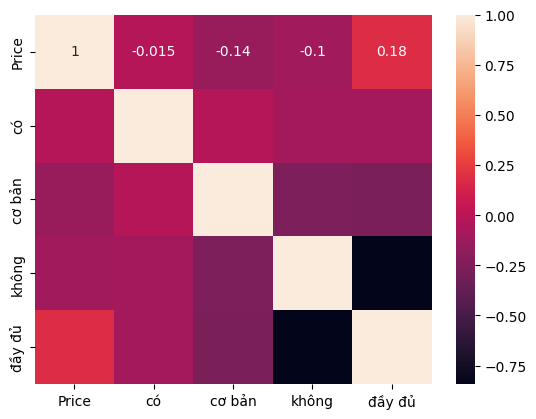

In [31]:

sns.heatmap(test[test['Rent type'] == 'Nhà trọ, phòng trọ'][target].corr(), annot=True)

In [32]:
test.columns

Index(['Rent type', 'Area', 'Price', 'Bedrooms', 'Toilets', 'Floors', 'có',
       'cơ bản', 'không', 'đầy đủ', '1', '10', '11', '12', '2', '3', '4', '5',
       '6', '7', '8', '9', 'bình chánh', 'bình thạnh', 'bình tân', 'củ chi',
       'gò vấp', 'hóc môn', 'nhà bè', 'phú nhuận', 'thủ đức', 'tân bình',
       'tân phú'],
      dtype='object')

In [33]:
target = ['Price', 'bình chánh', 'thủ đức']
test[test['Rent type'] == 'Nhà trọ, phòng trọ'][target]

,Price,bình chánh,thủ đức
24,"1,500,000",False,False
65,"4,000,000",False,False
67,"3,000,000",False,False
78,"4,000,000",False,False
136,"2,500,000",False,True
...,...,...,...
40582,"5,500,000",False,False
40585,"6,500,000",False,False
40586,"6,500,000",False,False
40587,"7,000,000",False,False


<Axes: >

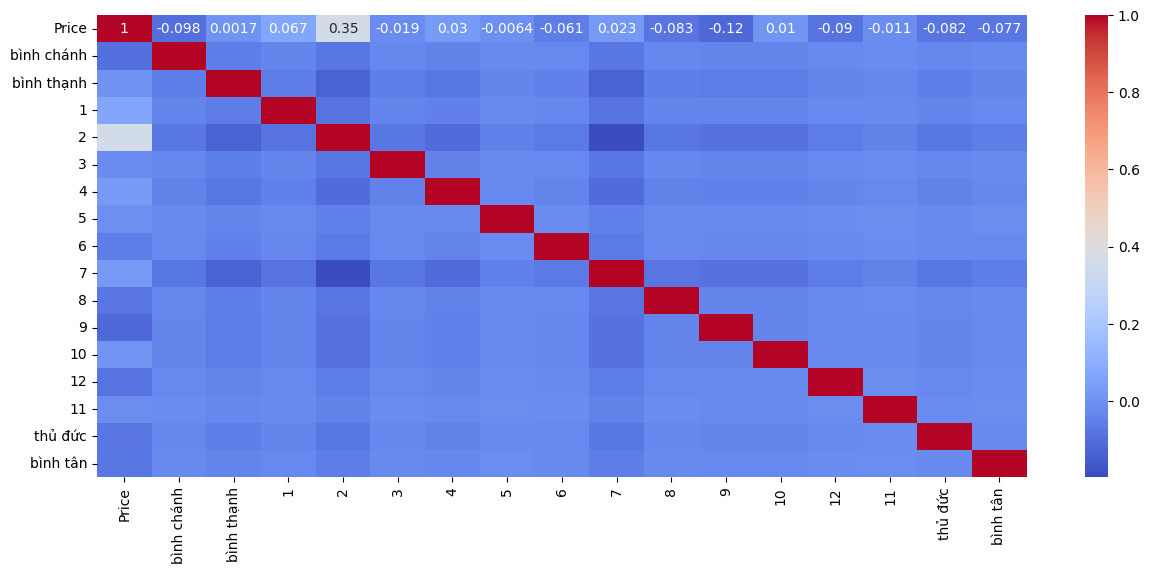

In [148]:
target = ['Price', 'bình chánh', 'bình thạnh', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '11', 'thủ đức', 'bình tân']

plt.pyplot.figure(figsize=(15,6))
sns.heatmap(test[test['Rent type'] == 'Căn hộ chung cư'][target].corr(), annot=True, cmap='coolwarm')